# [通し課題]

通し課題で具体的にやること と DAY1の宿題
1. 自分が取り組む通し課題を1つ選択する  
 • Kaggleアカウントを作成し、該当課題のデータをダウンロードする   
2. 目的変数と説明変数の関係を確認するためのグラフを作成する（ここからはNotebook上の作業です）   
3. 目的変数を説明するのに有効そうな説明変数を見つける   
4. DAY1で学んだアルゴリズムを利用する  
 • 回帰の場合は線形回帰、分類の場合はロジスティック回帰  
 • 質的変数が扱えないアルゴリズムを使う場合は、ダミー変数に置き換える   
5. 予測精度または識別精度を確認する  
• 回帰問題の場合は、MSE、RMSE、MAEを求める  
• 分類問題の場合は、混同行列を作成し、Accuracy、Recall、Precisionを求める   
6. できたところまでをNotebookでまとめ、KernelsまたはGithubで公開する  
• 公開方法がわからない方は、ipynbファイルを所属チャンネルに貼る 


# 1. 自分が取り組む通し課題を１つ選択する


### 1.1. 今回の課題において、「***Kickstarter Project***」を選択。

### 1.2. pandas,numpy,matplotlib,codecs,sklearnの各ライブラリをインポート

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import codecs as cd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix
import seaborn as sns

### 1.3.該当課題のデータをダウンロードして、データを読み込む

In [3]:
#201801のデータを読み込んでみる
with cd.open('ks-projects-201801.csv', 'r', 'utf-8', 'ignore') as f18:
    df_f18 = pd.read_csv(f18)
#df_f18 = pd.read_csv('ks-projects-201801.csv')

print("201801=======================")
#最初の五行を表示してみる。
display(df_f18.head())
#統計値を表示してみる。
display(df_f18.describe())
#欠損値がある行数を数えてみる。
display(df_f18.isnull().sum())
#各列のデータタイプを確認してみる。
display(df_f18.dtypes)

FileNotFoundError: [Errno 2] No such file or directory: 'ks-projects-201801.csv'

### 1.4.欠損値がある行は、とりあえずなくしてみる。

In [4]:
#１個でも欠損値がある行はとりあえず削除してみる。
df_f18_dna = df_f18.dropna(how='any')
#最初の五行を表示してみる。
display(df_f18_dna.head())
#統計値を表示してみる。
display(df_f18_dna.describe())
#欠損値がある行数を数えてみる。
display(df_f18_dna.isnull().sum())

NameError: name 'df_f18' is not defined

### 1.5. 成功（successful)と失敗（failed)の行に絞って考える。

In [5]:
#stateの要素の個数を数えてみる。
df_f18_dna['state'].value_counts()

NameError: name 'df_f18_dna' is not defined

In [6]:
#成功だけを抽出したDFと失敗だけを抽出したDF
df_f18_success = df_f18_dna[df_f18_dna['state']=='successful']
df_f18_failed =  df_f18_dna[df_f18_dna['state']=='failed']
#両方を結合
df_f18_SorF = pd.concat([df_f18_success,df_f18_failed])
#stateの要素の個数を数えてみる。
df_f18_SorF['state'].value_counts()

failed        123222
successful     83767
Name: state, dtype: int64

### 1.6. カテゴリ変数は文字列から数値化してみる。
警告がでますが、取り急ぎ、スルー。

In [7]:
#LabelEncoderのインスタンスを生成
le = LabelEncoder()

#categoryに出てくるカテゴリを覚えて
#categoryを数値に変換
le = le.fit(df_f18_SorF['category'])
df_f18_SorF['category'] = le.transform(df_f18_SorF['category'])

#main_categoryに出てくるカテゴリを覚えて
#main_categoryを数値に変換
le = le.fit(df_f18_SorF['main_category'])
df_f18_SorF['main_category'] = le.transform(df_f18_SorF['main_category'])

#currencyに出てくるカテゴリを覚えて
#currencyを数値に変換
le = le.fit(df_f18_SorF['currency'])
df_f18_SorF['currency'] = le.transform(df_f18_SorF['currency'])

#stateに出てくるカテゴリを覚えて
#stateを数値に変換
le = le.fit(df_f18_SorF['state'])
df_f18_SorF['state'] = le.transform(df_f18_SorF['state'])

#countryに出てくるカテゴリを覚えて
#countryを数値に変換
le = le.fit(df_f18_SorF['country'])
df_f18_SorF['country'] = le.transform(df_f18_SorF['country'])


df_f18_SorF.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
5,1000014025,Monarch Espresso Bar,123,7,13,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,1,224.0,21,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,58,7,13,2014-12-21,1000.0,2014-12-01 18:30:44,1205.0,1,16.0,21,1205.00,1205.00,1000.00
11,100005484,Lisa Lim New CD!,72,10,13,2013-04-08,12500.0,2013-03-09 06:42:58,12700.0,1,100.0,21,12700.00,12700.00,12500.00
14,1000057089,Tombstone: Old West tabletop game and miniatur...,136,8,5,2017-05-03,5000.0,2017-04-05 19:44:18,94175.0,1,761.0,9,57763.78,121857.33,6469.73
18,1000070642,Mike Corey's Darkness & Light Album,90,10,13,2012-08-17,250.0,2012-08-02 14:11:32,250.0,1,7.0,21,250.00,250.00,250.00


In [8]:
#カテゴリ変数’state'の数値変換後の数を確認してみる。
df_f18_SorF['state'].value_counts()

0    123222
1     83767
Name: state, dtype: int64

'***successful***'と'***false***'の数と一致しているのでよしとする。

# 2. 目的変数と説明変数の関係を確認するためのグラフを作成する

### 2.1 散布図行列を書いてみる。

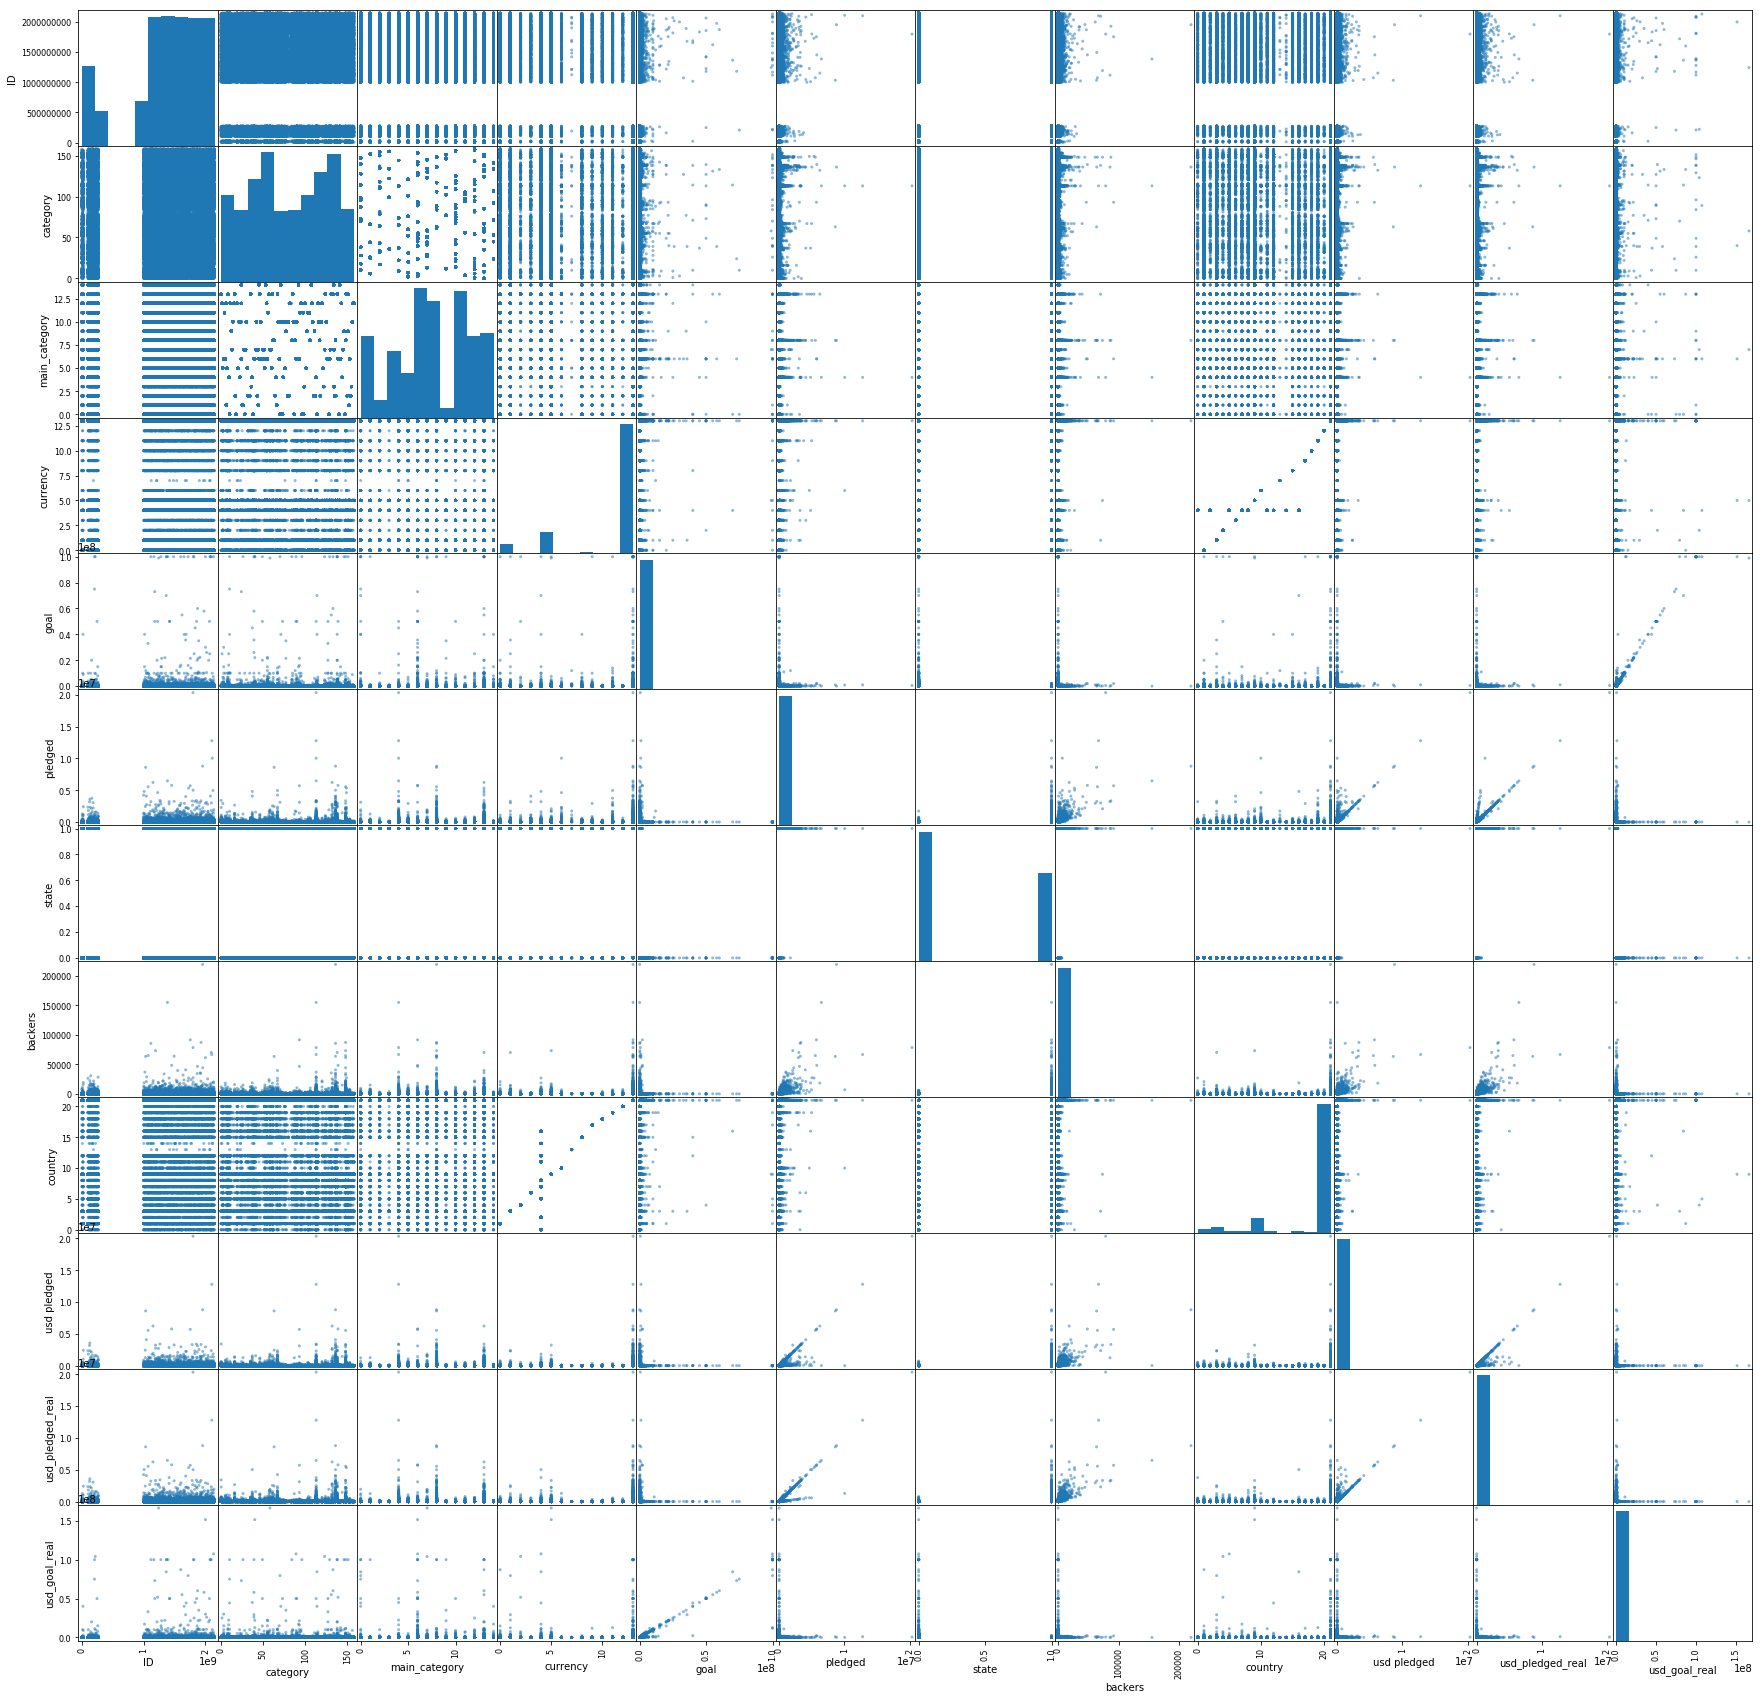

In [9]:
# まず、201801の散布図行列を書いてみる
pd.plotting.scatter_matrix(df_f18_SorF, figsize=(30,30))
plt.show()

***「state」と相関がありそうなのは、「goal」、「pledged」、「backers」、「usd pledged」、「usd_pledged_real」、「usd_goal_real」  
ただし、「pledged」、「usd pledged」、「usd_pledged_real」は、結果として得られる数値なので、予測には使えない。  
実質、「goal」、「backers」、「usd_goal_real」の３つが予測には使えそう。***

### 2.2.「goal」、「backers」の関係を見てみる。

In [1]:
#成功と、失敗でデータを分ける。
df_f18_S = df_f18_SorF[df_f18_SorF['state']==1]
df_f18_F = df_f18_SorF[df_f18_SorF['state']==0]

#それぞれをプロットしてみる
plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')
plt.plot(df_f18_S["backers"], df_f18_S["goal"], 'o', color='C0', label='successful', alpha=0.5)
plt.plot(df_f18_F["backers"], df_f18_F["goal"], 'o', color='C1', label='false', alpha=0.5)
plt.legend(loc='best')
plt.show()

NameError: name 'df_f18_SorF' is not defined

うまく分類できそうな感じになっている。

### 2.3 対数をとってみる。

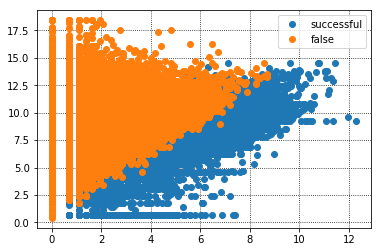

In [11]:
#Log(0)対策
delta=1

#「goal」、「backers」の対数の関係を見てみる。
plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')
plt.plot(np.log(df_f18_S["backers"]+delta), np.log(df_f18_S["goal"]+delta), 'o', color='C0', label='successful')
plt.plot(np.log(df_f18_F["backers"]+delta), np.log(df_f18_F["goal"]+delta), 'o', color='C1', label='false')
plt.legend(loc='best')
plt.show()

さらに分類できそうな感じになってきた。

###  2.4.「goal」、「usd_goal_real」の関係を見てみる。

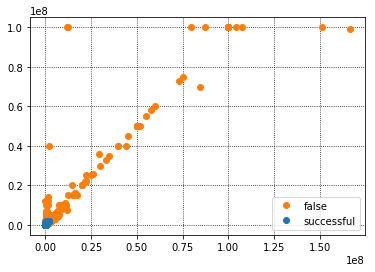

In [12]:
plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')
plt.plot(df_f18_F["usd_goal_real"], df_f18_F["goal"], 'o', color='C1', label='false')
plt.plot(df_f18_S["usd_goal_real"], df_f18_S["goal"], 'o', color='C0', label='successful')
plt.legend(loc='best')
plt.show()

***重なっていてうまく分類できなさそう。***

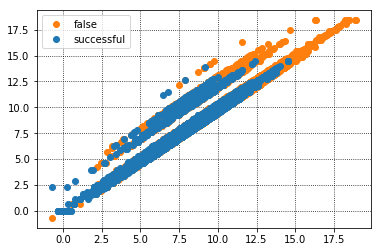

In [13]:
plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')
plt.plot(np.log(df_f18_F["usd_goal_real"]), np.log(df_f18_F["goal"]), 'o', color='C1', label='false')
plt.plot(np.log(df_f18_S["usd_goal_real"]), np.log(df_f18_S["goal"]), 'o', color='C0', label='successful')
plt.legend(loc='best')
plt.show()

***対数をとってみてもかぶっていて、うまく分類できなさそう。***

### 2.5. 相関係数を求めてみる。

In [14]:
#相関係数を求めてみる。
display(df_f18_SorF.corr())

,ID,category,main_category,currency,goal,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,1.000000,0.000282,-0.000251,0.003040,0.002058,0.002998,-0.002126,0.001886,0.002518,0.001122,0.002462,0.001979
category,0.000282,1.000000,0.197056,-0.011752,0.002809,0.031366,0.036012,0.042327,-0.012154,0.027869,0.032409,0.002451
main_category,-0.000251,0.197056,1.000000,-0.011709,0.000902,0.005315,-0.032982,0.000610,-0.010416,0.006221,0.006706,-0.000320
currency,0.003040,-0.011752,-0.011709,1.000000,-0.006740,0.004683,0.061261,0.010650,0.986221,0.014338,0.010734,-0.005571
goal,0.002058,0.002809,0.000902,-0.006740,1.000000,0.008468,-0.024539,0.003990,-0.005988,0.006395,0.006060,0.952079
pledged,0.002998,0.031366,0.005315,0.004683,0.008468,1.000000,0.109601,0.701454,0.004845,0.848288,0.940217,0.005555
state,-0.002126,0.036012,-0.032982,0.061261,-0.024539,0.109601,1.000000,0.119449,0.056935,0.095001,0.110642,-0.022840
backers,0.001886,0.042327,0.000610,0.010650,0.003990,0.701454,0.119449,1.000000,0.009829,0.666895,0.748285,0.004163
country,0.002518,-0.012154,-0.010416,0.986221,-0.005988,0.004845,0.056935,0.009829,1.000000,0.013719,0.010179,-0.005257
usd pledged,0.001122,0.027869,0.006221,0.014338,0.006395,0.848288,0.095001,0.666895,0.013719,1.000000,0.912222,0.006555


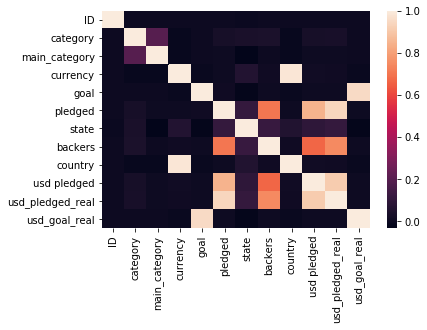

In [15]:
# 相関係数をヒートマップにして可視化
sns.heatmap(df_f18_SorF.corr())
plt.show()

あまりStateと相関が大きい項目はなさそう。

# 3. 目的変数を説明するのに有効そうな説明変数を見つける 

### これまでの結果から「goal」、「backers」を有効そうな説明変数とする。

# 4. DAY1で学んだアルゴリズムを利用する  
 • 回帰の場合は線形回帰、分類の場合はロジスティック回帰  

### 4.1. state が successful か failed の２値に分類するため、ロジスティック回帰で分類してみる。

In [16]:
#目的変数'state'を正解としてyに格納
y = df_f18_SorF['state'].values
#説明変数'goal','backers'を入力としてXに格納
X = df_f18_SorF[['goal', 'backers']].values

#ロジスティック回帰で学習
clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234)
clf.fit(X, y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=10000, n_iter=None,
       n_jobs=1, penalty='none', power_t=0.5, random_state=1234,
       shuffle=True, tol=None, verbose=0, warm_start=False)

# 5. 予測精度または識別精度を確認する  
• 分類問題の場合は、混同行列を作成し、Accuracy、Recall、Precisionを求める

In [17]:
# 学習した結果を使って説明変数を入力して予測
y_est = clf.predict(X)

#混同行列を作成
tn, fp, fn, tp = confusion_matrix(y, y_est).ravel()
print(fn, fp)
print(tn, tp)

#'Accuracy、Recall、Precisionを求めて表示
print('Accuracy  = {:.3f}%'.format(100 * (tn+tp)/(tn+fp+fn+tp)))
print('Recall    = {:.3f}%'.format(100 * (tp)/(fn+tp)))
print('Precision = {:.3f}%'.format(100 * (tp)/(fp+tp)))

2996 19902
103320 80771
Accuracy  = 88.938%
Recall    = 96.423%
Precision = 80.231%
